##### $\hspace{15pt}$ **Filename: pdDataframesVsPaTables.ipynb**
##### $\hspace{1.5pt}$ **Date Created: July 24, 2024**
##### $\rule{5.3in}{1pt}$
##### **Compare the memory usage of pandas dataframes and pyarrow tables.**
##### $\rule{5.3in}{1pt}$

##### Load modules and packages.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa
import random
import string
import sys

##### Define a function that generates a random dataframe with 150 columns of integer, float, and object data types.

In [2]:
def generateDataframe(nRows):
    "Generate a random dataframe with 150 columns of integer, float, and object data types."

    data1 = np.array([random.randint(-100, 100) for _ in range(nRows*50)]).reshape(-1, 50)
    df1 = pd.DataFrame(data1, columns = ["x" + str(i) for i in range(50)])

    data2 = np.array([random.uniform(-100, 100) for _ in range(nRows*50)]).reshape(-1, 50)
    df2 = pd.DataFrame(data2, columns = ["x" + str(i) for i in range(50, 100)])

    def generateString():
        "Generate a random string with 5 alphanumeric characters."

        return ''.join(random.choice(string.ascii_lowercase + string.digits) for _ in range(5))

    data3 = np.array([generateString() for _ in range(nRows*50)]).reshape(-1,50)
    df3 = pd.DataFrame(data3, columns = ["x" + str(i) for i in range(100, 150)])

    df = pd.concat([df1, df2, df3], axis = 1)
    columns = df.columns.tolist()
    random.shuffle(columns)
    df = df[columns]
    df.columns = ["x" + str(i) for i in range(150)]

    return df

##### Generate 10 random pandas dataframes with 150 columns and increasing number of rows, convert them to pyarrow tables, and record the memory usage of the dataframes and tables.

In [3]:
nRows = []
dfSizes = []
tbSizes = []
random.seed(1)

for i in range(1, 11):

    nRows.append(10000*i)
    df = generateDataframe(10000*i)
    tb = pa.Table.from_pandas(df)

    dfSize = math.ceil(sys.getsizeof(df)/(1024*1024))
    dfSizes.append(dfSize)

    tbSize = math.ceil(sys.getsizeof(tb)/(1024*1024))
    tbSizes.append(tbSize)

##### Plot the memory usage of the dataframes and tables against the number of rows.

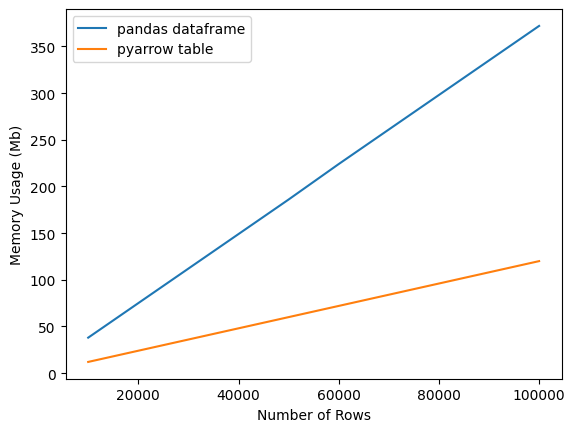

In [4]:
plt.plot(nRows, dfSizes)
plt.plot(nRows, tbSizes)
plt.xlabel("Number of Rows")
plt.ylabel("Memory Usage (Mb)")
plt.legend(["pandas dataframe", "pyarrow table"], loc ="upper left")
plt.show()